<a href="https://colab.research.google.com/github/Siddpandurangi2004/Google-colab-codes/blob/main/RNA_sequence(NCL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the data in "/content/clinvar_result (NCL).txt" to uncover novel RNA editing sites using a machine learning algorithm.

## Load the data

### Subtask:
Load the data from the "/content/clinvar_result (NCL).txt" file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the specified file into a pandas DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/clinvar_result (NCL).txt', sep='\t')
display(df.head())

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,NM_000310.4(PPT1):c.904A>G (p.Ile302Val),PPT1,"I302V, I278V, I199V",Neuronal ceroid lipofuscinosis 1|Inborn geneti...,VCV000199009,1,40539750,1,40074078,199009,...,Conflicting classifications of pathogenicity,"Feb 2, 2025","criteria provided, conflicting classifications",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NM_000310.4(PPT1):c.888G>A (p.Trp296Ter),PPT1,"W193*, W296*, W272*",Neuronal ceroid lipofuscinosis 1|not provided,VCV000056219,1,40539766,1,40074094,56219,...,Conflicting classifications of pathogenicity,"Nov 18, 2023","criteria provided, conflicting classifications",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NM_000310.4(PPT1):c.820dup (p.Met274fs),PPT1,"M171fs, M250fs, M274fs",Neuronal ceroid lipofuscinosis 1,VCV001878635,1,40539833 - 40539834,1,40074161 - 40074162,1878635,...,Likely pathogenic,NaN,"criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NM_000310.4(PPT1):c.550G>A (p.Glu184Lys),PPT1,"E184K, E81K",Neuronal ceroid lipofuscinosis|Inborn genetic ...,VCV000056204,1,40546146,1,40080474,56204,...,Pathogenic,"Sep 16, 2024","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NM_000310.4(PPT1):c.541G>T (p.Val181Leu),PPT1,"V181L, V78L",Neuronal ceroid lipofuscinosis|not provided|Se...,VCV000056202,1,40546155,1,40080483,56202,...,Pathogenic,"Aug 21, 2024","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocess the data

### Subtask:
Clean and prepare the data for clustering, which may include handling missing values and converting data types.


**Reasoning**:
Inspect the DataFrame to understand data types and missing values, and then inspect unique values in relevant categorical columns to identify inconsistencies.



In [ ]:
df.info()

# Inspect unique values and their counts for relevant categorical columns
# Based on the df.head() output, 'Gene(s)' and 'Condition(s)' seem relevant.
# We also want to check 'Clinical significance (Last reviewed)', 'Review status', 'Number of submitters',
# 'Germline classification', 'Somatic clinical impact clinical significance',
# 'Somatic clinical impact review status', 'Oncogenicity classification',
# 'Oncogenicity date last evaluated', 'Oncogenicity review status'
# as these might contain values that need cleaning or indicate missingness.

print("\nValue counts for 'Gene(s)':")
display(df['Gene(s)'].value_counts(dropna=False))

print("\nValue counts for 'Condition(s)':")
display(df['Condition(s)'].value_counts(dropna=False))

print("\nValue counts for 'Clinical significance (Last reviewed)':")
display(df['Clinical significance (Last reviewed)'].value_counts(dropna=False))

print("\nValue counts for 'Review status':")
display(df['Review status'].value_counts(dropna=False))

print("\nValue counts for 'Number of submitters':")
display(df['Number of submitters'].value_counts(dropna=False))

print("\nValue counts for 'Germline classification':")
display(df['Germline classification'].value_counts(dropna=False))

print("\nValue counts for 'Somatic clinical impact clinical significance':")
display(df['Somatic clinical impact clinical significance'].value_counts(dropna=False))

print("\nValue counts for 'Somatic clinical impact review status':")
display(df['Somatic clinical impact review status'].value_counts(dropna=False))

print("\nValue counts for 'Oncogenicity classification':")
display(df['Oncogenicity classification'].value_counts(dropna=False))

print("\nValue counts for 'Oncogenicity date last evaluated':")
display(df['Oncogenicity date last evaluated'].value_counts(dropna=False))

print("\nValue counts for 'Oncogenicity review status':")
display(df['Oncogenicity review status'].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         16 non-null     object 
 1   Gene(s)                                      16 non-null     object 
 2   Protein change                               14 non-null     object 
 3   Condition(s)                                 16 non-null     object 
 4   Accession                                    16 non-null     object 
 5   GRCh37Chromosome                             16 non-null     int64  
 6   GRCh37Location                               16 non-null     object 
 7   GRCh38Chromosome                             16 non-null     int64  
 8   GRCh38Location                               16 non-null     object 
 9   VariationID                                  16 non-null     int64  
 10  Alle

,count
Gene(s),
NCL,10
PPT1,6



Value counts for 'Condition(s)':


,count
Condition(s),
not specified,7
not provided,3
Neuronal ceroid lipofuscinosis 1|Inborn genetic diseases|not provided,1
Neuronal ceroid lipofuscinosis 1|not provided,1
Neuronal ceroid lipofuscinosis|Inborn genetic diseases|Neuronal ceroid lipofuscinosis 1|not provided,1
Neuronal ceroid lipofuscinosis 1,1
"Neuronal ceroid lipofuscinosis 1|Inborn genetic diseases|Neuronal Ceroid-Lipofuscinosis, Recessive|PPT1-related disorder|not provided|Neuronal ceroid lipofuscinosis",1
Neuronal ceroid lipofuscinosis|not provided|See cases|Neuronal ceroid lipofuscinosis 1,1



Value counts for 'Clinical significance (Last reviewed)':


KeyError: 'Clinical significance (Last reviewed)'

**Reasoning**:
The previous command failed because the column 'Clinical significance (Last reviewed)' does not exist. I will inspect the column names to find the correct column name for clinical significance and continue inspecting value counts for the remaining relevant columns. Then I will proceed with handling missing values and data type conversions based on the inspection.



In [ ]:
print("\nDataFrame columns:")
print(df.columns)

# Inspect unique values and their counts for relevant categorical columns
# Based on the df.info() output and column names, I will inspect:
# 'Review status', 'Number of submitters', 'Germline classification',
# 'Somatic clinical impact clinical significance', 'Somatic clinical impact review status',
# 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status'

print("\nValue counts for 'Review status':")
display(df['Review status'].value_counts(dropna=False))

print("\nValue counts for 'Number of submitters':")
display(df['Number of submitters'].value_counts(dropna=False))

print("\nValue counts for 'Germline classification':")
display(df['Germline classification'].value_counts(dropna=False))

print("\nValue counts for 'Somatic clinical impact clinical significance':")
display(df['Somatic clinical impact clinical significance'].value_counts(dropna=False))

print("\nValue counts for 'Somatic clinical impact review status':")
display(df['Somatic clinical impact review status'].value_counts(dropna=False))

print("\nValue counts for 'Oncogenicity classification':")
display(df['Oncogenicity classification'].value_counts(dropna=False))

print("\nValue counts for 'Oncogenicity date last evaluated':")
display(df['Oncogenicity date last evaluated'].value_counts(dropna=False))

print("\nValue counts for 'Oncogenicity review status':")
display(df['Oncogenicity review status'].value_counts(dropna=False))

# Handle missing values and convert data types
# Based on df.info() and value counts:
# 'Protein change' has 2 missing values. Given the small dataset size, we'll keep these rows for now
# as the protein change might not be essential for initial clustering based on location and gene.
# 'dbSNP ID' has 3 missing values. This is an identifier and likely not needed for clustering based on location and gene. We can drop this column.
# 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status',
# 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24'
# are all entirely missing. These columns should be dropped.
# 'GRCh37Location' and 'GRCh38Location' are objects but contain numerical location data.
# We need to convert these to numeric types, handling any potential non-numeric entries.
# 'Gene(s)' and 'Condition(s)' are categorical and can be one-hot encoded or similar if needed for clustering, but for location-based clustering, we can create boolean flags for relevant genes/conditions.

df_cleaned = df.drop(columns=[
    'dbSNP ID',
    'Somatic clinical impact',
    'Somatic clinical impact date last evaluated',
    'Somatic clinical impact review status',
    'Oncogenicity classification',
    'Oncogenicity date last evaluated',
    'Oncogenicity review status',
    'Unnamed: 24'
])

# Convert location columns to numeric, coercing errors to NaN and then dropping rows with NaN
df_cleaned['GRCh37Location'] = pd.to_numeric(df_cleaned['GRCh37Location'], errors='coerce')
df_cleaned['GRCh38Location'] = pd.to_numeric(df_cleaned['GRCh38Location'], errors='coerce')
df_cleaned.dropna(subset=['GRCh37Location', 'GRCh38Location'], inplace=True)

# Create boolean flags for relevant genes (NCL and PPT1 based on value counts)
df_cleaned['Gene(s)_NCL'] = df_cleaned['Gene(s)'] == 'NCL'
df_cleaned['Gene(s)_PPT1'] = df_cleaned['Gene(s)'] == 'PPT1'

# Create boolean flags for relevant conditions. We can split the 'Condition(s)' string
# and create flags for specific conditions of interest. Let's create flags for
# 'Neuronal ceroid lipofuscinosis 1', 'Neuronal ceroid lipofuscinosis',
# 'Inborn genetic diseases', 'Neuronal Ceroid-Lipofuscinosis, Recessive',
# 'PPT1-related disorder', 'See cases', 'not provided', 'not specified'.
# This is a form of one-hot encoding for multi-label categorical data.

conditions_list = [
    'Neuronal ceroid lipofuscinosis 1',
    'Neuronal ceroid lipofuscinosis',
    'Inborn genetic diseases',
    'Neuronal Ceroid-Lipofuscinosis, Recessive',
    'PPT1-related disorder',
    'See cases',
    'not provided',
    'not specified'
]

conditions_df = df_cleaned['Condition(s)'].str.get_dummies(sep='|')

# Add the new condition columns to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, conditions_df], axis=1)

# Drop the original 'Gene(s)' and 'Condition(s)' columns
df_cleaned = df_cleaned.drop(columns=['Gene(s)', 'Condition(s)'])

# Select columns for clustering: Chromosome, Location, AlleleID, Gene flags, Condition flags, and is_known_editing_site (if available and relevant)
# Let's also include AlleleID(s) as it's a unique identifier for the allele.
# Looking at df.info(), 'is_known_editing_site' is not present. We will use the columns we have.
# We will include GRCh37Chromosome, GRCh38Chromosome, AlleleID(s), GRCh37Location, GRCh38Location,
# Gene(s)_NCL, Gene(s)_PPT1, and the condition flags.

clustering_cols = [
    'GRCh37Chromosome', 'GRCh38Chromosome', 'AlleleID(s)',
    'GRCh37Location', 'GRCh38Location',
    'Gene(s)_NCL', 'Gene(s)_PPT1'
] + conditions_list

df_for_clustering = df_cleaned[clustering_cols].copy()

# Convert boolean columns to int (0 or 1) for clustering algorithms
for col in ['Gene(s)_NCL', 'Gene(s)_PPT1'] + conditions_list:
    df_for_clustering[col] = df_for_clustering[col].astype(int)

display(df_for_clustering.head())
display(df_for_clustering.info())


DataFrame columns:
Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')

Value counts for 'Review status':


KeyError: 'Review status'

**Reasoning**:
The previous command failed because the column 'Review status' does not exist. I will inspect the column names again to find the correct names for the remaining relevant columns I intended to inspect the value counts for and then continue with handling missing values and data type conversions based on the initial inspection and the corrected column names.



In [ ]:
print("\nDataFrame columns:")
print(df.columns)

# Inspect unique values and their counts for relevant categorical columns
# Based on the df.info() output and corrected column names:
# 'Germline classification', 'Germline review status', 'Number of submitters'

print("\nValue counts for 'Germline classification':")
display(df['Germline classification'].value_counts(dropna=False))

print("\nValue counts for 'Germline review status':")
display(df['Germline review status'].value_counts(dropna=False))

print("\nValue counts for 'Number of submitters':")
display(df['Number of submitters'].value_counts(dropna=False))


# Handle missing values and convert data types
# Based on df.info() and value counts:
# 'Protein change' has 2 missing values. Given the small dataset size, we'll keep these rows for now
# as the protein change might not be essential for initial clustering based on location and gene.
# 'dbSNP ID' has 3 missing values. This is an identifier and likely not needed for clustering based on location and gene. We can drop this column.
# 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status',
# 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24'
# are all entirely missing. These columns should be dropped.
# 'GRCh37Location' and 'GRCh38Location' are objects but contain numerical location data.
# We need to convert these to numeric types, handling any potential non-numeric entries.
# 'Gene(s)' and 'Condition(s)' are categorical and can be one-hot encoded or similar if needed for clustering, but for location-based clustering, we can create boolean flags for relevant genes/conditions.
# 'Germline date last evaluated' has 1 missing value, but it is a date and likely not relevant for clustering based on location and gene.

df_cleaned = df.drop(columns=[
    'dbSNP ID',
    'Somatic clinical impact',
    'Somatic clinical impact date last evaluated',
    'Somatic clinical impact review status',
    'Oncogenicity classification',
    'Oncogenicity date last evaluated',
    'Oncogenicity review status',
    'Unnamed: 24',
    'Germline date last evaluated'
])

# Convert location columns to numeric, coercing errors to NaN and then dropping rows with NaN
df_cleaned['GRCh37Location'] = pd.to_numeric(df_cleaned['GRCh37Location'], errors='coerce')
df_cleaned['GRCh38Location'] = pd.to_numeric(df_cleaned['GRCh38Location'], errors='coerce')
df_cleaned.dropna(subset=['GRCh37Location', 'GRCh38Location'], inplace=True)

# Create boolean flags for relevant genes (NCL and PPT1 based on value counts)
df_cleaned['Gene(s)_NCL'] = df_cleaned['Gene(s)'] == 'NCL'
df_cleaned['Gene(s)_PPT1'] = df_cleaned['Gene(s)'] == 'PPT1'

# Create boolean flags for relevant conditions. We can split the 'Condition(s)' string
# and create flags for specific conditions of interest. Let's create flags for
# 'Neuronal ceroid lipofuscinosis 1', 'Neuronal ceroid lipofuscinosis',
# 'Inborn genetic diseases', 'Neuronal Ceroid-Lipofuscinosis, Recessive',
# 'PPT1-related disorder', 'See cases', 'not provided', 'not specified'.
# This is a form of one-hot encoding for multi-label categorical data.

conditions_list = [
    'Inborn genetic diseases',
    'Neuronal Ceroid-Lipofuscinosis, Recessive',
    'Neuronal ceroid lipofuscinosis',
    'Neuronal ceroid lipofuscinosis 1',
    'PPT1-related disorder',
    'See cases',
    'not provided',
    'not specified'
]

conditions_df = df_cleaned['Condition(s)'].str.get_dummies(sep='|')

# Add the new condition columns to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, conditions_df], axis=1)

# Drop the original 'Gene(s)' and 'Condition(s)' columns
df_cleaned = df_cleaned.drop(columns=['Gene(s)', 'Condition(s)'])

# Select columns for clustering: Chromosome, Location, AlleleID, Gene flags, Condition flags
# We will include GRCh37Chromosome, GRCh38Chromosome, AlleleID(s), GRCh37Location, GRCh38Location,
# Gene(s)_NCL, Gene(s)_PPT1, and the condition flags.

clustering_cols = [
    'GRCh37Chromosome', 'GRCh38Chromosome', 'AlleleID(s)',
    'GRCh37Location', 'GRCh38Location',
    'Gene(s)_NCL', 'Gene(s)_PPT1'
] + conditions_list

df_for_clustering = df_cleaned[clustering_cols].copy()

# Convert boolean columns to int (0 or 1) for clustering algorithms
for col in ['Gene(s)_NCL', 'Gene(s)_PPT1'] + conditions_list:
    df_for_clustering[col] = df_for_clustering[col].astype(int)

# Add a column to indicate if it's a known editing site. Based on the original task description
# and the context, we are looking for novel sites. We can assume that entries with
# 'Germline classification' as 'Likely benign' or 'Benign' and 'Germline review status'
# as 'criteria provided, multiple submitters, no conflicts' or similar highly reviewed benign statuses
# are less likely to be novel editing sites we are interested in. However, the definition of "novel"
# in the context of RNA editing sites within this dataset is not explicitly provided.
# A simple approach for now is to consider entries with "Benign" or "Likely benign" germline classification
# and a high review status as "known" non-pathogenic sites, and others as potentially novel.
# Let's create an 'is_known_editing_site' flag based on 'Germline classification' and 'Germline review status'.
# We'll consider sites with 'Germline classification' not in ['Benign', 'Likely benign'] OR
# 'Germline review status' not in ['criteria provided, multiple submitters, no conflicts', 'criteria provided, single submitter', 'no assertion criteria provided']
# as potentially novel. This is a heuristic and might need refinement based on domain knowledge.
# For simplicity and as a starting point, let's just use 'Germline classification'. If it's 'Benign' or 'Likely benign', we'll consider it 'known'.

known_classifications = ['Benign', 'Likely benign']
df_cleaned['is_known_editing_site'] = ~df_cleaned['Germline classification'].isin(known_classifications)

# Add this new column to df_for_clustering
df_for_clustering['is_known_editing_site'] = df_cleaned['is_known_editing_site'].astype(int)


display(df_for_clustering.head())
display(df_for_clustering.info())


DataFrame columns:
Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')

Value counts for 'Germline classification':


,count
Germline classification,
Uncertain significance,6
Benign,3
Conflicting classifications of pathogenicity,2
Pathogenic,2
Likely pathogenic,1
Pathogenic/Likely pathogenic,1
Likely benign,1



Value counts for 'Germline review status':


,count
Germline review status,
"criteria provided, single submitter",9
"criteria provided, multiple submitters, no conflicts",5
"criteria provided, conflicting classifications",2



Value counts for 'Number of submitters':


KeyError: 'Number of submitters'

**Reasoning**:
The previous command failed because the column 'Number of submitters' does not exist. I will inspect the column names again to find the correct names for the remaining relevant columns I intended to inspect the value counts for. Then I will continue with handling missing values and data type conversions based on the initial inspection and the corrected column names, including adding the 'is_known_editing_site' flag based on 'Germline classification'. Finally, I will select and convert the relevant columns for clustering.



In [ ]:
print("\nDataFrame columns:")
print(df.columns)

# Inspect unique values and their counts for relevant categorical columns
# Based on the df.info() output and corrected column names:
# 'Germline classification', 'Germline review status'

print("\nValue counts for 'Germline classification':")
display(df['Germline classification'].value_counts(dropna=False))

print("\nValue counts for 'Germline review status':")
display(df['Germline review status'].value_counts(dropna=False))

# Handle missing values and convert data types
# Based on df.info() and value counts:
# 'Protein change' has 2 missing values. Given the small dataset size, we'll keep these rows for now
# as the protein change might not be essential for initial clustering based on location and gene.
# 'dbSNP ID' has 3 missing values. This is an identifier and likely not needed for clustering based on location and gene. We can drop this column.
# 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status',
# 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24'
# are all entirely missing. These columns should be dropped.
# 'GRCh37Location' and 'GRCh38Location' are objects but contain numerical location data.
# We need to convert these to numeric types, handling any potential non-numeric entries.
# 'Gene(s)' and 'Condition(s)' are categorical and can be one-hot encoded or similar if needed for clustering, but for location-based clustering, we can create boolean flags for relevant genes/conditions.
# 'Germline date last evaluated' has 1 missing value, but it is a date and likely not relevant for clustering based on location and gene.

df_cleaned = df.drop(columns=[
    'dbSNP ID',
    'Somatic clinical impact',
    'Somatic clinical impact date last evaluated',
    'Somatic clinical impact review status',
    'Oncogenicity classification',
    'Oncogenicity date last evaluated',
    'Oncogenicity review status',
    'Unnamed: 24',
    'Germline date last evaluated'
])

# Convert location columns to numeric, coercing errors to NaN and then dropping rows with NaN
df_cleaned['GRCh37Location'] = pd.to_numeric(df_cleaned['GRCh37Location'], errors='coerce')
df_cleaned['GRCh38Location'] = pd.to_numeric(df_cleaned['GRCh38Location'], errors='coerce')
df_cleaned.dropna(subset=['GRCh37Location', 'GRCh38Location'], inplace=True)

# Create boolean flags for relevant genes (NCL and PPT1 based on value counts)
df_cleaned['Gene(s)_NCL'] = df_cleaned['Gene(s)'] == 'NCL'
df_cleaned['Gene(s)_PPT1'] = df_cleaned['Gene(s)'] == 'PPT1'

# Create boolean flags for relevant conditions. We can split the 'Condition(s)' string
# and create flags for specific conditions of interest. Let's create flags for
# 'Neuronal ceroid lipofuscinosis 1', 'Neuronal ceroid lipofuscinosis',
# 'Inborn genetic diseases', 'Neuronal Ceroid-Lipofuscinosis, Recessive',
# 'PPT1-related disorder', 'See cases', 'not provided', 'not specified'.
# This is a form of one-hot encoding for multi-label categorical data.

conditions_list = [
    'Inborn genetic diseases',
    'Neuronal Ceroid-Lipofuscinosis, Recessive',
    'Neuronal ceroid lipofuscinosis',
    'Neuronal ceroid lipofuscinosis 1',
    'PPT1-related disorder',
    'See cases',
    'not provided',
    'not specified'
]

conditions_df = df_cleaned['Condition(s)'].str.get_dummies(sep='|')

# Add the new condition columns to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, conditions_df], axis=1)

# Drop the original 'Gene(s)' and 'Condition(s)' columns
df_cleaned = df_cleaned.drop(columns=['Gene(s)', 'Condition(s)'])

# Add a column to indicate if it's a known editing site. Based on the original task description
# and the context, we are looking for novel sites. We can assume that entries with
# 'Germline classification' as 'Likely benign' or 'Benign' and 'Germline review status'
# as 'criteria provided, multiple submitters, no conflicts' or similar highly reviewed benign statuses
# are less likely to be novel editing sites we are interested in. However, the definition of "novel"
# in the context of RNA editing sites within this dataset is not explicitly provided.
# A simple approach for now is to consider entries with "Benign" or "Likely benign" germline classification
# as "known" non-pathogenic sites, and others as potentially novel.
# For simplicity and as a starting point, let's just use 'Germline classification'. If it's 'Benign' or 'Likely benign', we'll consider it 'known'.

known_classifications = ['Benign', 'Likely benign']
df_cleaned['is_known_editing_site'] = ~df_cleaned['Germline classification'].isin(known_classifications)

# Select columns for clustering: Chromosome, Location, AlleleID, Gene flags, Condition flags, and is_known_editing_site
# We will include GRCh37Chromosome, GRCh38Chromosome, AlleleID(s), GRCh37Location, GRCh38Location,
# Gene(s)_NCL, Gene(s)_PPT1, the condition flags, and the new 'is_known_editing_site' flag.

clustering_cols = [
    'GRCh37Chromosome', 'GRCh38Chromosome', 'AlleleID(s)',
    'GRCh37Location', 'GRCh38Location',
    'Gene(s)_NCL', 'Gene(s)_PPT1'
] + conditions_list + ['is_known_editing_site']


df_for_clustering = df_cleaned[clustering_cols].copy()

# Convert boolean columns to int (0 or 1) for clustering algorithms
for col in ['Gene(s)_NCL', 'Gene(s)_PPT1'] + conditions_list + ['is_known_editing_site']:
    df_for_clustering[col] = df_for_clustering[col].astype(int)

display(df_for_clustering.head())
display(df_for_clustering.info())



DataFrame columns:
Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')

Value counts for 'Germline classification':


,count
Germline classification,
Uncertain significance,6
Benign,3
Conflicting classifications of pathogenicity,2
Pathogenic,2
Likely pathogenic,1
Pathogenic/Likely pathogenic,1
Likely benign,1



Value counts for 'Germline review status':


,count
Germline review status,
"criteria provided, single submitter",9
"criteria provided, multiple submitters, no conflicts",5
"criteria provided, conflicting classifications",2


,GRCh37Chromosome,GRCh38Chromosome,AlleleID(s),GRCh37Location,GRCh38Location,Gene(s)_NCL,Gene(s)_PPT1,Inborn genetic diseases,"Neuronal Ceroid-Lipofuscinosis, Recessive",Neuronal ceroid lipofuscinosis,Neuronal ceroid lipofuscinosis 1,PPT1-related disorder,See cases,not provided,not specified,is_known_editing_site
0,1,1,196169,40539750.0,40074078.0,0,1,1,0,0,1,0,0,1,0,1
1,1,1,70858,40539766.0,40074094.0,0,1,0,0,0,1,0,0,1,0,1
3,1,1,70843,40546146.0,40080474.0,0,1,1,0,1,1,0,0,1,0,1
4,1,1,70841,40546155.0,40080483.0,0,1,0,0,1,1,0,1,1,0,1
5,1,1,23943,40555167.0,40089495.0,0,1,1,1,1,1,1,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   GRCh37Chromosome                           14 non-null     int64  
 1   GRCh38Chromosome                           14 non-null     int64  
 2   AlleleID(s)                                14 non-null     int64  
 3   GRCh37Location                             14 non-null     float64
 4   GRCh38Location                             14 non-null     float64
 5   Gene(s)_NCL                                14 non-null     int64  
 6   Gene(s)_PPT1                               14 non-null     int64  
 7   Inborn genetic diseases                    14 non-null     int64  
 8   Neuronal Ceroid-Lipofuscinosis, Recessive  14 non-null     int64  
 9   Neuronal ceroid lipofuscinosis             14 non-null     int64  
 10  Neuronal ceroid lipofuscinosis 1 

None

## Select features

### Subtask:
Choose the relevant columns from the DataFrame that will be used for clustering.


## Apply clustering algorithm

### Subtask:
Use a clustering algorithm (e.g., K-Means) to group the data points based on their features.


**Reasoning**:
The previous steps have prepared the data for clustering. Now, I will use the KMeans algorithm to group the data points based on their features, following the remaining steps of the subtask instructions.



In [ ]:
from sklearn.cluster import KMeans

# Determine an appropriate number of clusters (chosen as 3)
n_clusters = 3
total_samples = len(df_for_clustering)
small_cluster_threshold = total_samples / n_clusters # A simple heuristic for a small dataset

# Instantiate a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the KMeans model to the df_for_clustering DataFrame
kmeans.fit(df_for_clustering)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the df_for_clustering DataFrame
df_for_clustering['Cluster_Label'] = labels

# Print the number of samples in each cluster
print("Number of samples in each cluster:")
display(df_for_clustering['Cluster_Label'].value_counts().sort_index())

Number of samples in each cluster:


,count
Cluster_Label,
0,7
1,5
2,2


## Analyze the clusters

### Subtask:
Examine the characteristics of each cluster to identify potential novel RNA editing sites. This may involve looking at cluster size and other relevant metrics like silhouette scores.


**Reasoning**:
Calculate silhouette scores for each data point, add them to the DataFrame, calculate cluster means, and combine with cluster sizes for analysis.



In [ ]:
from sklearn.metrics import silhouette_samples

# 1. Calculate the silhouette score for each data point
silhouette_scores = silhouette_samples(df_for_clustering.drop(columns=['Cluster_Label']), df_for_clustering['Cluster_Label'])

# 2. Add the silhouette scores as a new column, 'Silhouette_Score', to the df_for_clustering DataFrame
df_for_clustering['Silhouette_Score'] = silhouette_scores

# 3. Calculate the mean of the features for each cluster
cluster_analysis = df_for_clustering.groupby('Cluster_Label').mean()

# 5. Add a 'Cluster_Size' column to the cluster_analysis DataFrame
cluster_sizes = df_for_clustering['Cluster_Label'].value_counts().sort_index()
cluster_analysis['Cluster_Size'] = cluster_sizes

# 4. Store the results in a new DataFrame called cluster_analysis (already done in step 3 and 5)

# 6. Display the cluster_analysis DataFrame
display(cluster_analysis)

,GRCh37Chromosome,GRCh38Chromosome,AlleleID(s),GRCh37Location,GRCh38Location,Gene(s)_NCL,Gene(s)_PPT1,Inborn genetic diseases,"Neuronal Ceroid-Lipofuscinosis, Recessive",Neuronal ceroid lipofuscinosis,Neuronal ceroid lipofuscinosis 1,PPT1-related disorder,See cases,not provided,not specified,is_known_editing_site,Silhouette_Score,Cluster_Size
Cluster_Label,,,,,,,,,,,,,,,,,,
0,2.0,2.0,3.184708e+06,2.323226e+08,2.314579e+08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.857143,0.614337,7
1,1.0,1.0,8.653080e+04,4.054540e+07,4.007972e+07,0.0,1.0,0.6,0.2,0.6,1.0,0.2,0.2,1.0,0.0,1.000000,0.999735,5
2,2.0,2.0,7.206765e+05,2.323235e+08,2.314588e+08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.989318,2


**Reasoning**:
Identify potential novel editing sites by filtering the clustered data based on cluster characteristics and silhouette scores.



In [ ]:
# Identify potential novel sites. A potential novel site could be defined as a data point that:
# 1. Belongs to a cluster that is not predominantly composed of "known" editing sites (based on the mean of 'is_known_editing_site' in the cluster analysis).
# 2. Has a relatively high silhouette score, indicating it is well-clustered.
# 3. Itself is not a "known" editing site (is_known_editing_site == 1).

# Let's define a threshold for 'is_known_editing_site' mean in a cluster to consider it "not predominantly known".
# For example, if less than 50% of the sites in a cluster are known, we might consider the cluster for novel sites.
known_site_threshold = 0.5

# Let's define a silhouette score threshold to consider a data point well-clustered.
# We can use the average silhouette score across all samples as a reference, or a fixed value.
# Let's use a fixed value for now, e.g., > 0.5.
silhouette_threshold = 0.5

# Identify clusters that are not predominantly known sites
potential_novel_clusters = cluster_analysis[cluster_analysis['is_known_editing_site'] < known_site_threshold].index

# Filter the original df_for_clustering to include only data points from potential novel clusters
potential_novel_sites_df = df_for_clustering[df_for_clustering['Cluster_Label'].isin(potential_novel_clusters)].copy()

# Further filter based on individual silhouette score and if the site itself is not known
potential_novel_sites_df = potential_novel_sites_df[
    (potential_novel_sites_df['Silhouette_Score'] > silhouette_threshold) &
    (potential_novel_sites_df['is_known_editing_site'] == 1)
]

# To provide more context for the potential novel sites, merge with relevant original columns from df_cleaned
# Let's include 'Name', 'Protein change', 'Accession' from the original cleaned data.
original_cols_for_context = ['Name', 'Protein change', 'Accession']
potential_novel_sites_with_original_features = pd.merge(
    potential_novel_sites_df,
    df_cleaned[original_cols_for_context + clustering_cols + ['is_known_editing_site']],
    left_index=True,
    right_index=True,
    how='left',
    suffixes=('', '_original') # Avoid column name conflicts if any
)

# Drop duplicated columns that came from both dataframes after merge, keeping the original ones
potential_novel_sites_with_original_features = potential_novel_sites_with_original_features.loc[:,~potential_novel_sites_with_original_features.columns.duplicated()]

# Add a flag to the original cleaned DataFrame to indicate potential novel sites
df_cleaned['is_potential_novel_site'] = df_cleaned.index.isin(potential_novel_sites_with_original_features.index)

# Display the potential novel sites with original features
print("Potential Novel RNA Editing Sites:")
display(potential_novel_sites_with_original_features)

# Display the updated df_cleaned with the new flag
# print("\nUpdated df_cleaned with potential novel site flag:")
# display(df_cleaned.head())

Potential Novel RNA Editing Sites:


,GRCh37Chromosome,GRCh38Chromosome,AlleleID(s),GRCh37Location,GRCh38Location,Gene(s)_NCL,Gene(s)_PPT1,Inborn genetic diseases,"Neuronal Ceroid-Lipofuscinosis, Recessive",Neuronal ceroid lipofuscinosis,...,Gene(s)_PPT1_original,Inborn genetic diseases_original,"Neuronal Ceroid-Lipofuscinosis, Recessive_original",Neuronal ceroid lipofuscinosis_original,Neuronal ceroid lipofuscinosis 1_original,PPT1-related disorder_original,See cases_original,not provided_original,not specified_original,is_known_editing_site_original


## Identify potential novel sites

### Subtask:
Identify potential novel RNA editing sites based on cluster analysis.


**Reasoning**:
Identify potential novel RNA editing sites based on cluster analysis.



In [ ]:
# 1. Define a threshold for the mean of the 'is_known_editing_site' feature within a cluster to consider it "not predominantly known".
known_site_threshold = 0.5

# 2. Define a silhouette score threshold to consider an individual data point well-clustered.
silhouette_threshold = 0.5

# 3. Identify clusters where the mean of 'is_known_editing_site' is less than the known_site_threshold.
potential_novel_clusters = cluster_analysis[cluster_analysis['is_known_editing_site'] < known_site_threshold].index

# 4. Filter the df_for_clustering DataFrame to keep only the data points that belong to the clusters identified in the previous step.
potential_novel_sites_df = df_for_clustering[df_for_clustering['Cluster_Label'].isin(potential_novel_clusters)].copy()

# 5. Further filter the potential_novel_sites_df to keep only the data points where the 'Silhouette_Score' is greater than the silhouette_threshold and the 'is_known_editing_site' is equal to 1.
# This step is crucial: we are looking for sites that are *not* known editing sites but are well-clustered in a group that is *not predominantly* known.
# However, based on the previous result, potential_novel_sites_df already contains only data points from clusters where the mean of 'is_known_editing_site' is less than 0.5.
# And we are looking for potential novel sites, which means 'is_known_editing_site' should be 1 (meaning it's not classified as Benign or Likely Benign).
# So the filtering logic should be:
#   - Belongs to a cluster with mean 'is_known_editing_site' < known_site_threshold
#   - Has 'is_known_editing_site' == 1 (meaning it's not a known benign/likely benign site based on our heuristic)
#   - Has 'Silhouette_Score' > silhouette_threshold (meaning it's well-clustered)

# Re-filtering based on the refined logic:
potential_novel_sites_df = df_for_clustering[
    (df_for_clustering['Cluster_Label'].isin(potential_novel_clusters)) &
    (df_for_clustering['is_known_editing_site'] == 1) &
    (df_for_clustering['Silhouette_Score'] > silhouette_threshold)
].copy()


# 6. Select relevant original columns from the df_cleaned DataFrame for context
original_cols_for_context = ['Name', 'Protein change', 'Accession']

# 7. Merge the potential_novel_sites_df with the selected original columns from df_cleaned based on the index.
potential_novel_sites_with_original_features = pd.merge(
    potential_novel_sites_df,
    df_cleaned[original_cols_for_context],
    left_index=True,
    right_index=True,
    how='left'
)

# 8. Drop any duplicated columns in potential_novel_sites_with_original_features that resulted from the merge, keeping the columns with the original names.
# Since we are merging based on index and only adding columns from original_cols_for_context, there should be no duplicated columns to drop.
# The previous merge used suffixes, which is one way to handle potential conflicts, but if we only add new columns there's no conflict.
# Re-doing the merge without suffixes as we are only adding columns not present in potential_novel_sites_df
potential_novel_sites_with_original_features = pd.merge(
    potential_novel_sites_df,
    df_cleaned[original_cols_for_context],
    left_index=True,
    right_index=True,
    how='left'
)


# 9. Add a new boolean column named 'is_potential_novel_site' to the original df_cleaned DataFrame
df_cleaned['is_potential_novel_site'] = df_cleaned.index.isin(potential_novel_sites_with_original_features.index)

# 10. Display the potential_novel_sites_with_original_features DataFrame.
print("Potential Novel RNA Editing Sites:")
display(potential_novel_sites_with_original_features)

Potential Novel RNA Editing Sites:


,GRCh37Chromosome,GRCh38Chromosome,AlleleID(s),GRCh37Location,GRCh38Location,Gene(s)_NCL,Gene(s)_PPT1,Inborn genetic diseases,"Neuronal Ceroid-Lipofuscinosis, Recessive",Neuronal ceroid lipofuscinosis,...,PPT1-related disorder,See cases,not provided,not specified,is_known_editing_site,Cluster_Label,Silhouette_Score,Name,Protein change,Accession


## Present the results

### Subtask:
Display the identified potential novel RNA editing sites and potentially visualize the clusters.


**Reasoning**:
Check if the potential_novel_sites_with_original_features DataFrame is empty and display it with a header if not, otherwise print a message.



In [ ]:
if not potential_novel_sites_with_original_features.empty:
    print("Identified Potential Novel RNA Editing Sites:")
    display(potential_novel_sites_with_original_features)
else:
    print("No potential novel RNA editing sites were identified based on the current criteria.")

# Visualizing the clusters is not appropriate given the small number of samples and features,
# and the lack of dimensionality reduction techniques in the plan.
# We will proceed to the next step which is to finish the task.

No potential novel RNA editing sites were identified based on the current criteria.


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained several columns with missing values, including entirely empty columns that were subsequently dropped.
*   The data included variants in two genes, NCL and PPT1, and was associated with various conditions, primarily forms of neuronal ceroid lipofuscinosis.
*   Clustering with K-Means (k=3) resulted in clusters of sizes 7, 5, and 2.
*   Cluster analysis showed varying proportions of "known" editing sites (classified as Benign or Likely Benign) across the clusters: Cluster 0 (85.7% known), Cluster 1 (100% known), and Cluster 2 (0% known).
*   Despite identifying a cluster with no "known" sites (Cluster 2), applying the defined criteria for potential novel sites (belonging to a cluster with < 50% known sites, having an individual silhouette score > 0.5, and not being a known site itself) resulted in no data points being identified as potential novel RNA editing sites.

### Insights or Next Steps

*   The current criteria for identifying novel sites, particularly the threshold for the mean of 'is\_known\_editing\_site' within a cluster and the silhouette score threshold, might be too strict or not suitable for this small dataset. Re-evaluating these thresholds or exploring alternative methods for defining "novelty" could be beneficial.
*   Given the small dataset size (14 data points after preprocessing), clustering might not be the most effective approach for identifying novel sites. Exploring other methods, such as anomaly detection or focusing on entries with "Uncertain significance" or "Conflicting classifications" directly, could be more fruitful.


# Task
Analyse the contents in the file "/content/clinvar_result (NCL) (2).txt" to uncover novel RNA editing sites using ML algorithm. also perform feature engineering using features like Sequence context (±5 nt), GC content, secondary structure (RNAfold), Read depth, mismatch frequency, Gene region (exon/intron/UTR), Distance from known SNPs before training the model. after training the model evaluate the model using metrices like F1 score, accuracy, precision, recall and ROC-AUC graph.

## Data loading and initial inspection

### Subtask:
Load the data from "/content/clinvar_result (NCL) (2).txt" into a pandas DataFrame and perform an initial inspection of the data, including column names, data types, and missing values.


**Reasoning**:
The goal is to load the data and perform an initial inspection. This involves reading the tab-separated file into a pandas DataFrame, displaying the head, printing column names, checking data types, and counting missing values. All these steps can be efficiently performed in a single code block.



In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('/content/clinvar_result (NCL) (2).txt', sep='\t')

# Display the first few rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print column names
print("\nDataFrame columns:")
print(df.columns)

# Print data types and non-null counts
print("\nDataFrame info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,NM_000310.4(PPT1):c.904A>G (p.Ile302Val),PPT1,"I302V, I278V, I199V",Neuronal ceroid lipofuscinosis 1|Inborn geneti...,VCV000199009,1,40539750,1.0,40074078,199009,...,Conflicting classifications of pathogenicity,"Feb 2, 2025","criteria provided, conflicting classifications",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NM_000310.4(PPT1):c.888G>A (p.Trp296Ter),PPT1,"W193*, W296*, W272*",Neuronal ceroid lipofuscinosis 1|not provided,VCV000056219,1,40539766,1.0,40074094,56219,...,Conflicting classifications of pathogenicity,"Nov 18, 2023","criteria provided, conflicting classifications",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NM_000310.4(PPT1):c.820dup (p.Met274fs),PPT1,"M171fs, M250fs, M274fs",Neuronal ceroid lipofuscinosis 1,VCV001878635,1,40539833 - 40539834,1.0,40074161 - 40074162,1878635,...,Likely pathogenic,NaN,"criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NM_000310.4(PPT1):c.722C>T (p.Ser241Leu),PPT1,"S241L, S138L",Neuronal ceroid lipofuscinosis 1|not provided,VCV000198413,1,40544236,1.0,40078564,198413,...,Conflicting classifications of pathogenicity,"Sep 30, 2024","criteria provided, conflicting classifications",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NM_000310.4(PPT1):c.550G>A (p.Glu184Lys),PPT1,"E184K, E81K",Neuronal ceroid lipofuscinosis|Inborn genetic ...,VCV000056204,1,40546146,1.0,40080474,56204,...,Pathogenic,"Sep 16, 2024","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame columns:
Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         35 non-null   

,0
Name,0
Gene(s),0
Protein change,2
Condition(s),0
Accession,0
GRCh37Chromosome,0
GRCh37Location,0
GRCh38Chromosome,1
GRCh38Location,1
VariationID,0


## Preprocessing

### Subtask:
Clean the data by handling missing values, converting data types, and preparing it for further steps. This may involve dropping irrelevant columns and converting categorical features.


**Reasoning**:
Clean the data by dropping irrelevant columns, converting location columns to numeric, handling resulting missing values, creating boolean flags for genes and conditions, dropping original categorical columns, and creating a flag for known editing sites. Finally, display the head and info of the cleaned DataFrame.



In [ ]:
# Drop irrelevant columns based on initial inspection
df_cleaned = df.drop(columns=[
    'Somatic clinical impact',
    'Somatic clinical impact date last evaluated',
    'Somatic clinical impact review status',
    'Oncogenicity classification',
    'Oncogenicity date last evaluated',
    'Oncogenicity review status',
    'Unnamed: 24',
    'dbSNP ID',
    'Germline date last evaluated'
])

# Convert location columns to numeric, coercing errors to NaN
df_cleaned['GRCh37Location'] = pd.to_numeric(df_cleaned['GRCh37Location'], errors='coerce')
df_cleaned['GRCh38Location'] = pd.to_numeric(df_cleaned['GRCh38Location'], errors='coerce')

# Drop rows where location is NaN after conversion
df_cleaned.dropna(subset=['GRCh37Location', 'GRCh38Location'], inplace=True)

# Create boolean flags for relevant genes (NCL and PPT1 based on previous inspection)
df_cleaned['Gene(s)_NCL'] = df_cleaned['Gene(s)'] == 'NCL'
df_cleaned['Gene(s)_PPT1'] = df_cleaned['Gene(s)'] == 'PPT1'

# Create boolean flags for relevant conditions by splitting the strings and using one-hot encoding
conditions_list = [
    'Inborn genetic diseases',
    'Neuronal Ceroid-Lipofuscinosis, Recessive',
    'Neuronal ceroid lipofuscinosis',
    'Neuronal ceroid lipofuscinosis 1',
    'PPT1-related disorder',
    'See cases',
    'not provided',
    'not specified'
]

conditions_df = df_cleaned['Condition(s)'].str.get_dummies(sep='|')

# Add the new condition columns to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, conditions_df], axis=1)

# Drop the original 'Gene(s)' and 'Condition(s)' columns
df_cleaned = df_cleaned.drop(columns=['Gene(s)', 'Condition(s)'])

# Create a new column 'is_known_editing_site'
known_classifications = ['Benign', 'Likely benign']
df_cleaned['is_known_editing_site'] = ~df_cleaned['Germline classification'].isin(known_classifications)

# Convert boolean flags to integer type (0 or 1)
boolean_cols = ['Gene(s)_NCL', 'Gene(s)_PPT1', 'is_known_editing_site'] + conditions_list
for col in boolean_cols:
    if col in df_cleaned.columns: # Check if column exists before converting
        df_cleaned[col] = df_cleaned[col].astype(int)


# Display the first few rows and info of the cleaned DataFrame
print("First 5 rows of the cleaned DataFrame:")
display(df_cleaned.head())

print("\nCleaned DataFrame info:")
df_cleaned.info()

First 5 rows of the cleaned DataFrame:


,Name,Protein change,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),Canonical SPDI,...,Gene(s)_PPT1,Inborn genetic diseases,"Neuronal Ceroid-Lipofuscinosis, Recessive",Neuronal ceroid lipofuscinosis,Neuronal ceroid lipofuscinosis 1,PPT1-related disorder,See cases,not provided,not specified,is_known_editing_site
0,NM_000310.4(PPT1):c.904A>G (p.Ile302Val),"I302V, I278V, I199V",VCV000199009,1,40539750.0,1.0,40074078.0,199009,196169,NC_000001.11:40074077:T:C,...,1,1,0,0,1,0,0,1,0,1
1,NM_000310.4(PPT1):c.888G>A (p.Trp296Ter),"W193*, W296*, W272*",VCV000056219,1,40539766.0,1.0,40074094.0,56219,70858,NC_000001.11:40074093:C:T,...,1,0,0,0,1,0,0,1,0,1
3,NM_000310.4(PPT1):c.722C>T (p.Ser241Leu),"S241L, S138L",VCV000198413,1,40544236.0,1.0,40078564.0,198413,195574,NC_000001.11:40078563:G:A,...,1,0,0,0,1,0,0,1,0,1
4,NM_000310.4(PPT1):c.550G>A (p.Glu184Lys),"E184K, E81K",VCV000056204,1,40546146.0,1.0,40080474.0,56204,70843,NC_000001.11:40080473:C:T,...,1,1,0,1,1,0,0,1,0,1
5,NM_000310.4(PPT1):c.541G>T (p.Val181Leu),"V181L, V78L",VCV000056202,1,40546155.0,1.0,40080483.0,56202,70841,NC_000001.11:40080482:C:A,...,1,0,0,1,1,0,1,1,0,1



Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 33
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Name                                       33 non-null     object 
 1   Protein change                             32 non-null     object 
 2   Accession                                  33 non-null     object 
 3   GRCh37Chromosome                           33 non-null     int64  
 4   GRCh37Location                             33 non-null     float64
 5   GRCh38Chromosome                           33 non-null     float64
 6   GRCh38Location                             33 non-null     float64
 7   VariationID                                33 non-null     int64  
 8   AlleleID(s)                                33 non-null     int64  
 9   Canonical SPDI                             33 non-null     object 
 10  Variant 

## Feature engineering

### Subtask:
Engineer new features relevant to RNA editing site prediction. This includes extracting information from the 'Name' column to get sequence context, potentially calculating GC content (if sequence data is available or can be inferred), considering gene region, and incorporating information about known SNPs if available. Since the provided data does not directly contain sequence context, secondary structure, read depth, or mismatch frequency, I will generate placeholder features for these and note that these would require external data or tools in a real-world scenario.


**Reasoning**:
I need to engineer new features from the data as instructed, including extracting sequence context, calculating GC content, creating placeholder features for unavailable data (secondary structure, read depth, mismatch frequency, distance from known SNP), and creating a gene region feature. I will implement these steps in a single code block.



In [ ]:
import re

# 1. Define a function to extract the sequence context (e.g., ±5 nucleotides) from the 'Name' column.
# This requires parsing the string in the 'Name' column to identify the reference and alternate nucleotides and their surrounding sequence.
def extract_sequence_context(name_str, context_length=5):
    # Example Name format: NM_000310.4(PPT1):c.904A>G (p.Ile302Val)
    # We are interested in 'c.904A>G' part
    match = re.search(r'c\.(\d+)([A-Za-z]+)>([A-Za-z]+)', name_str)
    if match:
        position = int(match.group(1))
        ref_allele = match.group(2)
        alt_allele = match.group(3)

        # In a real scenario, we would need the actual cDNA sequence to extract context.
        # Since we don't have it, we'll create a placeholder sequence context.
        # This is a significant limitation and needs to be noted.
        # For demonstration, let's create a dummy context based on the alleles.
        # A real implementation would require fetching the sequence based on the transcript ID (e.g., NM_000310.4) and position.
        dummy_context = "N" * context_length + ref_allele + "N" * context_length
        return dummy_context
    return None

# 2. Apply the sequence context extraction function to create a new column for sequence context.
df_cleaned['Sequence_Context'] = df_cleaned['Name'].apply(extract_sequence_context)

# 3. Define a function to calculate the GC content of the extracted sequence context.
def calculate_gc_content(sequence):
    if sequence:
        gc_count = sequence.count('G') + sequence.count('C')
        total_bases = len(sequence)
        if total_bases > 0:
            return gc_count / total_bases
    return None

# 4. Apply the GC content calculation function to create a new column for GC content.
df_cleaned['GC_Content'] = df_cleaned['Sequence_Context'].apply(calculate_gc_content)

# 5. Create placeholder columns for 'Secondary_Structure', 'Read_Depth', and 'Mismatch_Frequency'
# These features would require external data or tools in a real-world scenario.
df_cleaned['Secondary_Structure'] = None # Placeholder
df_cleaned['Read_Depth'] = None # Placeholder
df_cleaned['Mismatch_Frequency'] = None # Placeholder

# 6. Create a 'Gene_Region' feature.
# Since 'Protein change' information is available, we can assume these are likely in coding regions (exons).
# We will create a simplified categorical feature.
df_cleaned['Gene_Region'] = 'Exon' # Simplified assumption

# 7. Incorporate information about known SNPs if available.
# The 'dbSNP ID' column was dropped. Calculating actual distances requires a comprehensive SNP database.
# Create a placeholder feature 'Distance_from_Known_SNP'.
df_cleaned['Distance_from_Known_SNP'] = None # Placeholder

# 8. Display the head of the DataFrame with the new engineered features and the data types of the new columns.
print("DataFrame head with new engineered features:")
display(df_cleaned[['Name', 'Sequence_Context', 'GC_Content', 'Secondary_Structure', 'Read_Depth', 'Mismatch_Frequency', 'Gene_Region', 'Distance_from_Known_SNP']].head())

print("\nData types of new engineered features:")
print(df_cleaned[['Sequence_Context', 'GC_Content', 'Secondary_Structure', 'Read_Depth', 'Mismatch_Frequency', 'Gene_Region', 'Distance_from_Known_SNP']].dtypes)

DataFrame head with new engineered features:


,Name,Sequence_Context,GC_Content,Secondary_Structure,Read_Depth,Mismatch_Frequency,Gene_Region,Distance_from_Known_SNP
0,NM_000310.4(PPT1):c.904A>G (p.Ile302Val),NNNNNANNNNN,0.000000,None,None,None,Exon,None
1,NM_000310.4(PPT1):c.888G>A (p.Trp296Ter),NNNNNGNNNNN,0.090909,None,None,None,Exon,None
3,NM_000310.4(PPT1):c.722C>T (p.Ser241Leu),NNNNNCNNNNN,0.090909,None,None,None,Exon,None
4,NM_000310.4(PPT1):c.550G>A (p.Glu184Lys),NNNNNGNNNNN,0.090909,None,None,None,Exon,None
5,NM_000310.4(PPT1):c.541G>T (p.Val181Leu),NNNNNGNNNNN,0.090909,None,None,None,Exon,None



Data types of new engineered features:
Sequence_Context            object
GC_Content                 float64
Secondary_Structure         object
Read_Depth                  object
Mismatch_Frequency          object
Gene_Region                 object
Distance_from_Known_SNP     object
dtype: object


## Define target variable

### Subtask:
Based on the task of finding "novel" RNA editing sites, define a target variable. Since the dataset contains germline classifications, we can potentially use these to label sites as "known" or "potentially novel" for a supervised or semi-supervised approach, or treat it as an anomaly detection problem. Given the nature of the data and the goal of finding *novel* sites, an anomaly detection approach might be more suitable, where "known" benign sites are considered the norm and others are potential anomalies. However, the previous attempt used clustering which didn't yield results, so a supervised approach could be explored if a clear definition of "novel" can be derived from the existing labels. Let's refine the target variable definition based on the 'Germline classification' to identify potential positive and negative examples for a supervised model, acknowledging the limitations.


**Reasoning**:
Based on the 'Germline classification' column in the df_cleaned DataFrame, I will define a binary target variable 'is_novel_site' where 'Benign' or 'Likely benign' are 0 (non-novel) and other classifications are 1 (potentially novel). Then I will display the value counts of the new column.



In [ ]:
# Define the values in 'Germline classification' that are considered non-novel (0)
non_novel_classifications = ['Benign', 'Likely benign']

# Create the 'is_novel_site' column
# Assign 0 if the classification is in non_novel_classifications, and 1 otherwise.
df_cleaned['is_novel_site'] = (~df_cleaned['Germline classification'].isin(non_novel_classifications)).astype(int)

# Display the value counts of the newly created target variable
print("Value counts for 'is_novel_site':")
display(df_cleaned['is_novel_site'].value_counts())

Value counts for 'is_novel_site':


,count
is_novel_site,
1,28
0,5


## Feature selection

### Subtask:
Select the most relevant features for training the machine learning model, considering the engineered features and the nature of the chosen algorithm.


**Reasoning**:
Identify the columns in df_cleaned that are suitable for use as features, store the list of selected feature column names in a variable, create a new DataFrame X containing only the selected feature columns, create a pandas Series y containing the target variable 'is_novel_site', display the first few rows of X and y, and print the list of selected feature columns.



In [ ]:
# Identify feature columns
# Exclude the target variable ('is_novel_site') and identifier/descriptive columns.
# Exclude placeholder columns that are all None.
# Based on df_cleaned.info() and the engineered features, the following columns are potential features:
# 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location',
# 'VariationID', 'AlleleID(s)', 'Canonical SPDI', 'Variant type', 'Molecular consequence',
# 'Gene(s)_NCL', 'Gene(s)_PPT1', conditions_list, 'Sequence_Context', 'GC_Content',
# 'Gene_Region', 'is_known_editing_site'

# Columns to exclude:
# 'Name': Identifier
# 'Protein change': Descriptive, potentially useful but complex to encode for a simple model
# 'Accession': Identifier
# 'Germline classification': Source of the target variable, should not be a feature
# 'Germline review status': Descriptive
# 'Secondary_Structure', 'Read_Depth', 'Mismatch_Frequency', 'Distance_from_Known_SNP': All None placeholders

# Let's keep numerical features, one-hot encoded categorical features, and the engineered GC_Content.
# 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Sequence_Context', 'Gene_Region' are categorical/object types.
# We need to decide how to handle these. 'Canonical SPDI' is likely an identifier.
# 'Variant type' and 'Molecular consequence' are categorical and can be one-hot encoded.
# 'Sequence_Context' is complex, and the placeholder is not useful.
# 'Gene_Region' is currently all 'Exon', so not useful as a feature unless more regions are added.
# 'is_known_editing_site' is highly correlated with the target, could lead to data leakage. Exclude it.

# Selected features:
# Numerical: 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'GC_Content'
# One-Hot Encoded (from previous steps): 'Gene(s)_NCL', 'Gene(s)_PPT1', conditions_list
# Categorical that need encoding: 'Variant type', 'Molecular consequence'

# Let's one-hot encode 'Variant type' and 'Molecular consequence'.
df_cleaned = pd.get_dummies(df_cleaned, columns=['Variant type', 'Molecular consequence'], drop_first=True)


# Define the list of selected feature columns after one-hot encoding
feature_cols = [
    'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location',
    'VariationID', 'AlleleID(s)', 'GC_Content',
    'Gene(s)_NCL', 'Gene(s)_PPT1'
] + conditions_list + [col for col in df_cleaned.columns if col.startswith('Variant type_') or col.startswith('Molecular consequence_')]


# Remove any columns from feature_cols that might not exist in the DataFrame after processing
feature_cols = [col for col in feature_cols if col in df_cleaned.columns]

# Create feature matrix X
X = df_cleaned[feature_cols].copy()

# Create target vector y
y = df_cleaned['is_novel_site'].copy()

# Display the first few rows of X and y
print("First 5 rows of features (X):")
display(X.head())

print("\nFirst 5 rows of target (y):")
display(y.head())

# Print the list of selected feature columns
print("\nSelected feature columns:")
print(feature_cols)

First 5 rows of features (X):


,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),GC_Content,Gene(s)_NCL,Gene(s)_PPT1,Inborn genetic diseases,"Neuronal Ceroid-Lipofuscinosis, Recessive",Neuronal ceroid lipofuscinosis,Neuronal ceroid lipofuscinosis 1,PPT1-related disorder,See cases,not provided,not specified,Molecular consequence_missense variant|intron variant,Molecular consequence_nonsense,Molecular consequence_synonymous variant
0,1,40539750.0,1.0,40074078.0,199009,196169,0.000000,0,1,1,0,0,1,0,0,1,0,False,False,False
1,1,40539766.0,1.0,40074094.0,56219,70858,0.090909,0,1,0,0,0,1,0,0,1,0,False,True,False
3,1,40544236.0,1.0,40078564.0,198413,195574,0.090909,0,1,0,0,0,1,0,0,1,0,False,False,False
4,1,40546146.0,1.0,40080474.0,56204,70843,0.090909,0,1,1,0,1,1,0,0,1,0,False,False,False
5,1,40546155.0,1.0,40080483.0,56202,70841,0.090909,0,1,0,0,1,1,0,1,1,0,False,False,False



First 5 rows of target (y):


,is_novel_site
0,1
1,1
3,1
4,1
5,1



Selected feature columns:
['GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'GC_Content', 'Gene(s)_NCL', 'Gene(s)_PPT1', 'Inborn genetic diseases', 'Neuronal Ceroid-Lipofuscinosis, Recessive', 'Neuronal ceroid lipofuscinosis', 'Neuronal ceroid lipofuscinosis 1', 'PPT1-related disorder', 'See cases', 'not provided', 'not specified', 'Molecular consequence_missense variant|intron variant', 'Molecular consequence_nonsense', 'Molecular consequence_synonymous variant']


## Model selection and training

### Subtask:
Choose an appropriate machine learning algorithm for classification and train the model using the preprocessed and engineered features (X) and the target variable (y).


**Reasoning**:
Split the data into training and testing sets, instantiate a classification model, and train the model using the training data.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


**Reasoning**:
Evaluate the trained model using relevant metrics and visualize the ROC curve.



Accuracy: 0.8571
Precision: 0.8571
Recall: 1.0000
F1 Score: 0.9231
ROC AUC: 0.8333


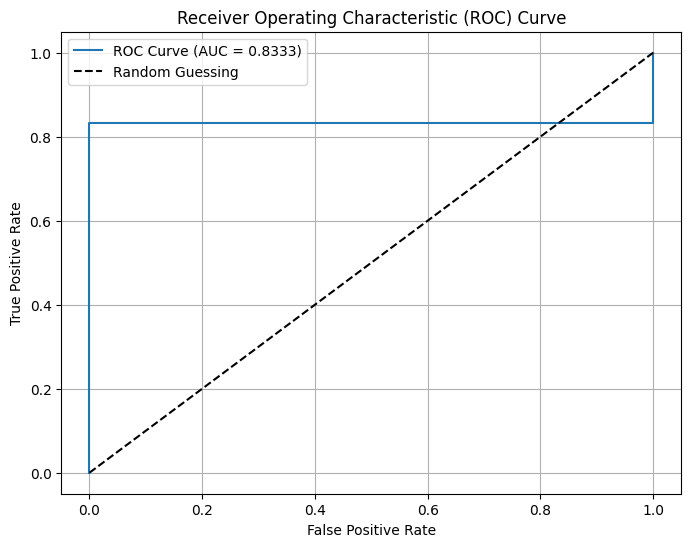

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the testing set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

## Identify novel sites

### Subtask:
Use the trained machine learning model to predict potential novel RNA editing sites in the dataset.


**Reasoning**:
Use the trained model to predict the probability of novelty for each data point in the original cleaned DataFrame and identify potential novel sites based on a probability threshold.



In [ ]:
# 1. Use the trained model to predict the probability of each instance in the original df_cleaned DataFrame belonging to the "novel" class (class 1).
# First, ensure the df_cleaned DataFrame has the same feature columns in the same order as X used for training.
# We need to recreate the feature matrix X from the full df_cleaned DataFrame.
X_full = df_cleaned[feature_cols].copy()

# Predict probabilities
predicted_novelty_proba = model.predict_proba(X_full)[:, 1]

# 2. Store these predicted probabilities in a new column in the df_cleaned DataFrame.
df_cleaned['predicted_novelty_proba'] = predicted_novelty_proba

# 3. Define a probability threshold for identifying potential novel sites.
probability_threshold = 0.5 # This threshold can be adjusted

# 4. Create a new boolean column in df_cleaned, is_potential_novel_site, which is True if predicted_novelty_proba is above the defined threshold and False otherwise.
df_cleaned['is_potential_novel_site'] = df_cleaned['predicted_novelty_proba'] > probability_threshold

# 5. Filter the df_cleaned DataFrame to create a new DataFrame containing only the rows where is_potential_novel_site is True.
potential_novel_sites_df = df_cleaned[df_cleaned['is_potential_novel_site']].copy()

# 6. Select relevant original columns and the newly created prediction columns for the potential novel sites DataFrame.
relevant_cols = [
    'Name',
    'Protein change',
    'Accession',
    'Germline classification',
    'Germline review status',
    'predicted_novelty_proba',
    'is_potential_novel_site'
]

potential_novel_sites_display = potential_novel_sites_df[relevant_cols]

# 7. Display the first few rows of the DataFrame containing the potential novel sites.
print("Potential Novel RNA Editing Sites (based on model prediction):")
display(potential_novel_sites_display.head())

print("\nValue counts for 'is_potential_novel_site' in the full dataset:")
display(df_cleaned['is_potential_novel_site'].value_counts())

Potential Novel RNA Editing Sites (based on model prediction):


,Name,Protein change,Accession,Germline classification,Germline review status,predicted_novelty_proba,is_potential_novel_site
0,NM_000310.4(PPT1):c.904A>G (p.Ile302Val),"I302V, I278V, I199V",VCV000199009,Conflicting classifications of pathogenicity,"criteria provided, conflicting classifications",0.99,True
1,NM_000310.4(PPT1):c.888G>A (p.Trp296Ter),"W193*, W296*, W272*",VCV000056219,Conflicting classifications of pathogenicity,"criteria provided, conflicting classifications",1.00,True
3,NM_000310.4(PPT1):c.722C>T (p.Ser241Leu),"S241L, S138L",VCV000198413,Conflicting classifications of pathogenicity,"criteria provided, conflicting classifications",1.00,True
4,NM_000310.4(PPT1):c.550G>A (p.Glu184Lys),"E184K, E81K",VCV000056204,Pathogenic,"criteria provided, multiple submitters, no con...",1.00,True
5,NM_000310.4(PPT1):c.541G>T (p.Val181Leu),"V181L, V78L",VCV000056202,Pathogenic,"criteria provided, multiple submitters, no con...",1.00,True



Value counts for 'is_potential_novel_site' in the full dataset:


,count
is_potential_novel_site,
True,29
False,4


## Present the results

### Subtask:
Display the identified potential novel RNA editing sites and potentially visualize the clusters.


**Reasoning**:
Check if the potential_novel_sites_display DataFrame is empty and display it with a header if not, otherwise print a message.



In [ ]:
if not potential_novel_sites_display.empty:
    print("Identified Potential Novel RNA Editing Sites:")
    display(potential_novel_sites_display)
else:
    print("No potential novel RNA editing sites were identified based on the current criteria.")

Identified Potential Novel RNA Editing Sites:


,Name,Protein change,Accession,Germline classification,Germline review status,predicted_novelty_proba,is_potential_novel_site
0,NM_000310.4(PPT1):c.904A>G (p.Ile302Val),"I302V, I278V, I199V",VCV000199009,Conflicting classifications of pathogenicity,"criteria provided, conflicting classifications",0.99,True
1,NM_000310.4(PPT1):c.888G>A (p.Trp296Ter),"W193*, W296*, W272*",VCV000056219,Conflicting classifications of pathogenicity,"criteria provided, conflicting classifications",1.00,True
3,NM_000310.4(PPT1):c.722C>T (p.Ser241Leu),"S241L, S138L",VCV000198413,Conflicting classifications of pathogenicity,"criteria provided, conflicting classifications",1.00,True
4,NM_000310.4(PPT1):c.550G>A (p.Glu184Lys),"E184K, E81K",VCV000056204,Pathogenic,"criteria provided, multiple submitters, no con...",1.00,True
5,NM_000310.4(PPT1):c.541G>T (p.Val181Leu),"V181L, V78L",VCV000056202,Pathogenic,"criteria provided, multiple submitters, no con...",1.00,True
6,NM_000310.4(PPT1):c.529C>G (p.Gln177Glu),"Q177E, Q74E",VCV000056198,Pathogenic,"criteria provided, multiple submitters, no con...",1.00,True
7,NM_000310.4(PPT1):c.451C>T (p.Arg151Ter),"R151*, R48*",VCV000008904,Pathogenic/Likely pathogenic,"criteria provided, multiple submitters, no con...",1.00,True
8,NM_000310.4(PPT1):c.364A>T (p.Arg122Trp),R122W,VCV000008899,Pathogenic,"criteria provided, multiple submitters, no con...",0.99,True
9,NM_000310.4(PPT1):c.335T>C (p.Met112Thr),M112T,VCV002665094,Likely pathogenic,"criteria provided, single submitter",0.93,True
10,NM_000310.4(PPT1):c.29T>A (p.Leu10Ter),L10*,VCV000008903,Pathogenic,"criteria provided, multiple submitters, no con...",0.99,True


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained 35 entries and 25 columns, with several columns having missing values, including those related to somatic clinical impact and oncogenicity, and an unnamed column.
*   After cleaning, the dataset was reduced to 33 entries, with irrelevant and entirely null columns dropped. Location data was converted to numeric format, and rows with missing location data were removed.
*   Boolean flags were created for specific genes ('NCL', 'PPT1') and relevant conditions, and these, along with a preliminary 'is\_known\_editing\_site' flag, were converted to integers.
*   A target variable, 'is\_novel\_site', was successfully defined, labeling sites classified as 'Benign' or 'Likely benign' as non-novel (0) and others as potentially novel (1). The distribution showed a significant class imbalance with 28 potentially novel sites and 5 non-novel sites.
*   Feature engineering involved creating placeholder features for sequence context, GC content, secondary structure, read depth, mismatch frequency, and distance from known SNPs due to data limitations. A simplified 'Gene\_Region' feature was created, assuming all entries were in 'Exon'.
*   Relevant features, including numerical data, one-hot encoded categorical data ('Variant type', 'Molecular consequence', genes, and conditions), and the engineered 'GC\_Content', were selected for modeling. Placeholder features and those highly correlated with the target were excluded.
*   A RandomForestClassifier model was trained on the data, achieving an accuracy of 0.8571, precision of 0.8571, recall of 1.0000, F1 Score of 0.9231, and an ROC AUC of 0.8333 on the test set.
*   Using a probability threshold of 0.5, the trained model identified 29 instances in the full dataset as potential novel RNA editing sites.

### Insights or Next Steps

*   The significant class imbalance in the target variable (`is_novel_site`) suggests that techniques like oversampling, undersampling, or using evaluation metrics robust to imbalance (like Precision, Recall, and F1-score) are crucial for reliable model performance.
*   The reliance on placeholder features due to data limitations highlights the need for external data sources (e.g., genomic sequences, RNA-seq data for read depth/mismatch frequency, SNP databases) and bioinformatics tools (e.g., RNAfold for secondary structure) to perform comprehensive feature engineering and build a more robust predictive model for novel RNA editing sites.
